# Assignment 5 (Multiple Linear Regression)-Q1

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
startup=pd.read_csv('E:\My folder\ExcelR\Assignments\Multi Linear Regression\Startups.csv')

In [ ]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data = startup.rename({'R&D Spend':'RND','Marketing Spend':'Marketing'}, axis=1)

In [ ]:
data.head()

,RND,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data=data.drop('State',axis=1)
data.head()

,RND,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Scatterplot between variables along with histograms

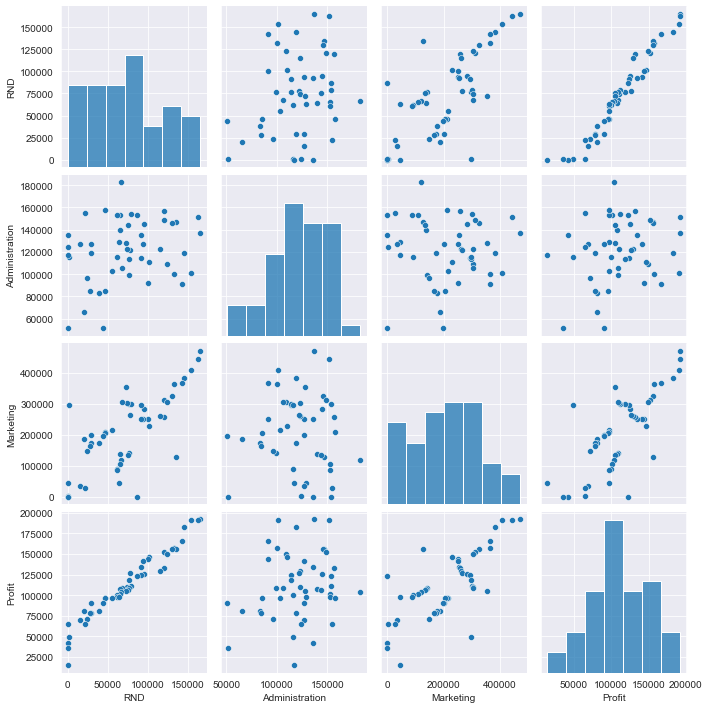

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Built Model

In [ ]:
# Built Model
model=smf.ols('Profit~RND+Administration+Marketing',data=data).fit()

In [ ]:
# Coefficient parameter
model.params

Intercept         50122.192990
RND                   0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [ ]:
# t-values and p-values
model.tvalues , model.pvalues

(Intercept          7.626218
 RND               17.846374
 Administration    -0.525507
 Marketing          1.655077
 dtype: float64,
 Intercept         1.057379e-09
 RND               2.634968e-22
 Administration    6.017551e-01
 Marketing         1.047168e-01
 dtype: float64)

In [ ]:
# Rsquared value
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Model

In [ ]:
ml_c=smf.ols('Profit~RND',data=data).fit()
#t and p-Values
ml_c.tvalues , ml_c.pvalues

(Intercept    19.320288
 RND          29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RND          3.500322e-32
 dtype: float64)

In [ ]:
ml_d=smf.ols('Profit~Administration',data=data).fit()
#t and p-Values
ml_d.tvalues , ml_d.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [ ]:
ml_cd=smf.ols('Profit~Marketing',data=data).fit()
#t and p-Values
ml_cd.tvalues , ml_cd.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

# Model Validation Technique
## 1) Variance inflation factor (VIF)

In [ ]:
# 1) Collinearity Problem Check
#  VIF = 1/(1-Rsquare) for all independent variables

rsq_rnd=smf.ols('RND~Administration+Marketing',data=data).fit().rsquared
vif_rnd=1/(1-rsq_rnd)

rsq_adm=smf.ols('Administration~RND+Marketing',data=data).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mark=smf.ols('Marketing~RND+Administration',data=data).fit().rsquared
vif_mark=1/(1-rsq_mark)

In [ ]:
# Storing vif values in a data frame
d1 = {'Variables':['RND' , 'Administration' , 'Marketing'],'VIF':[vif_rnd,vif_adm,vif_mark]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RND,2.468903
1,Administration,1.175091
2,Marketing,2.326773


## 2) Residual Analysis

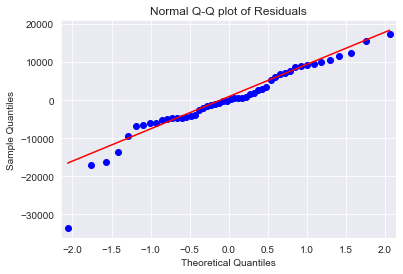

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')     # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [ ]:
list(np.where(model.resid>20000))

[array([], dtype=int64)]

In [ ]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

## i) Residual plot of Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

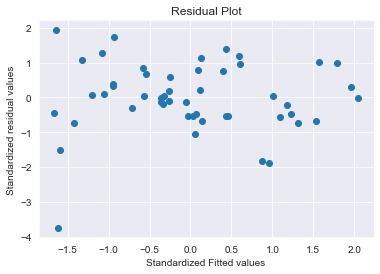

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## ii) Residual Vs Regressors (Test for error)

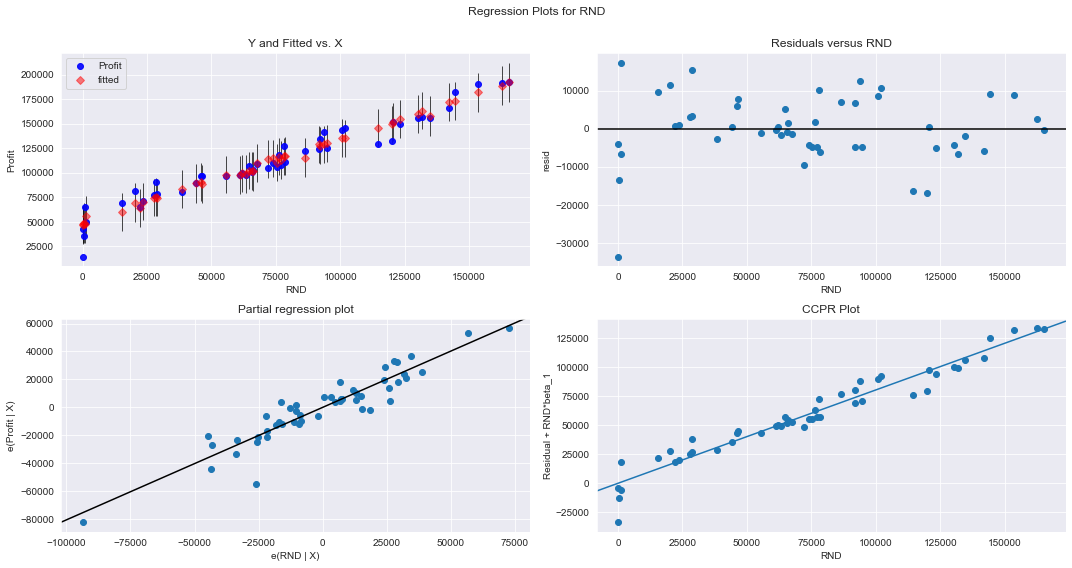

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RND", fig=fig)
plt.show()

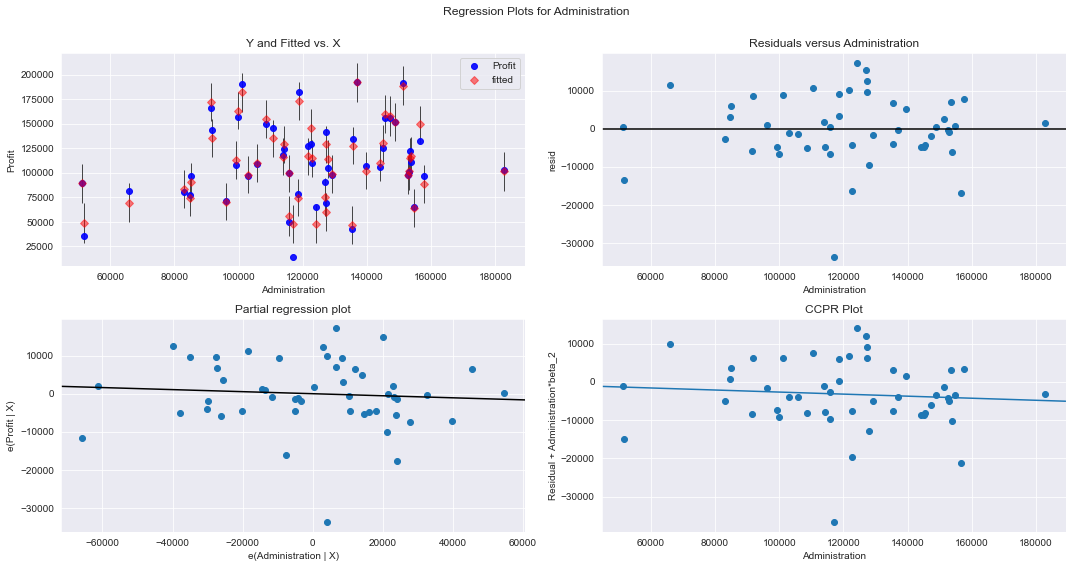

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

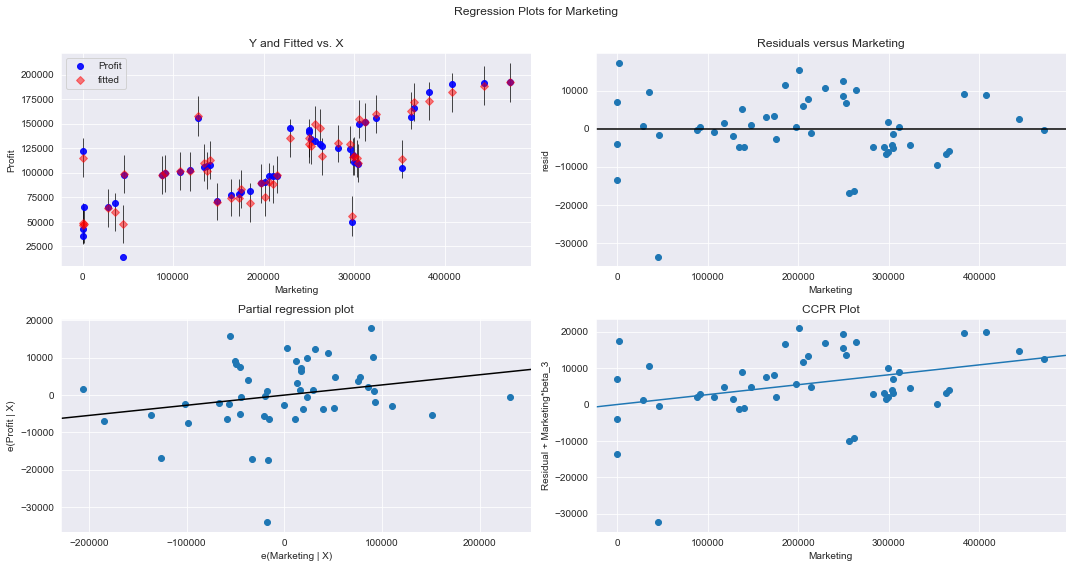

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
## 1) Cook's Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

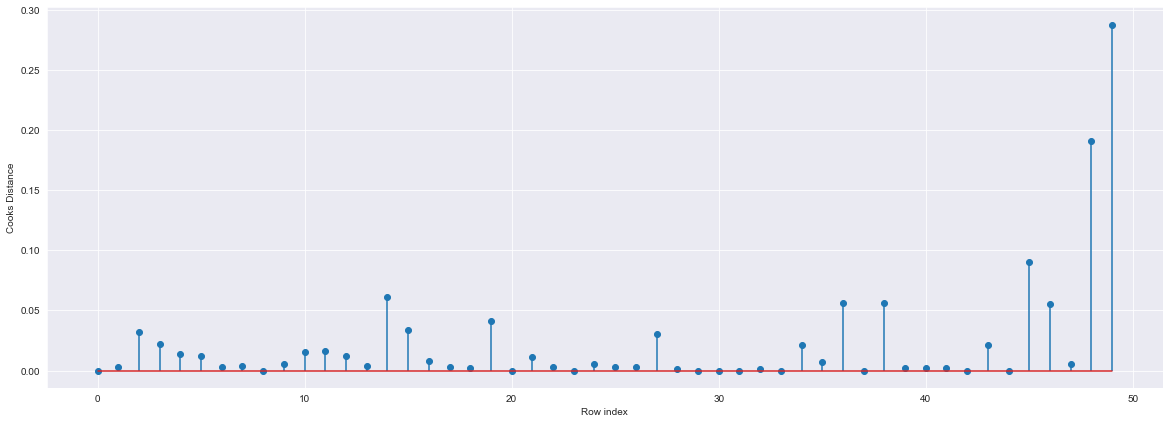

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

## 2) High Influence points

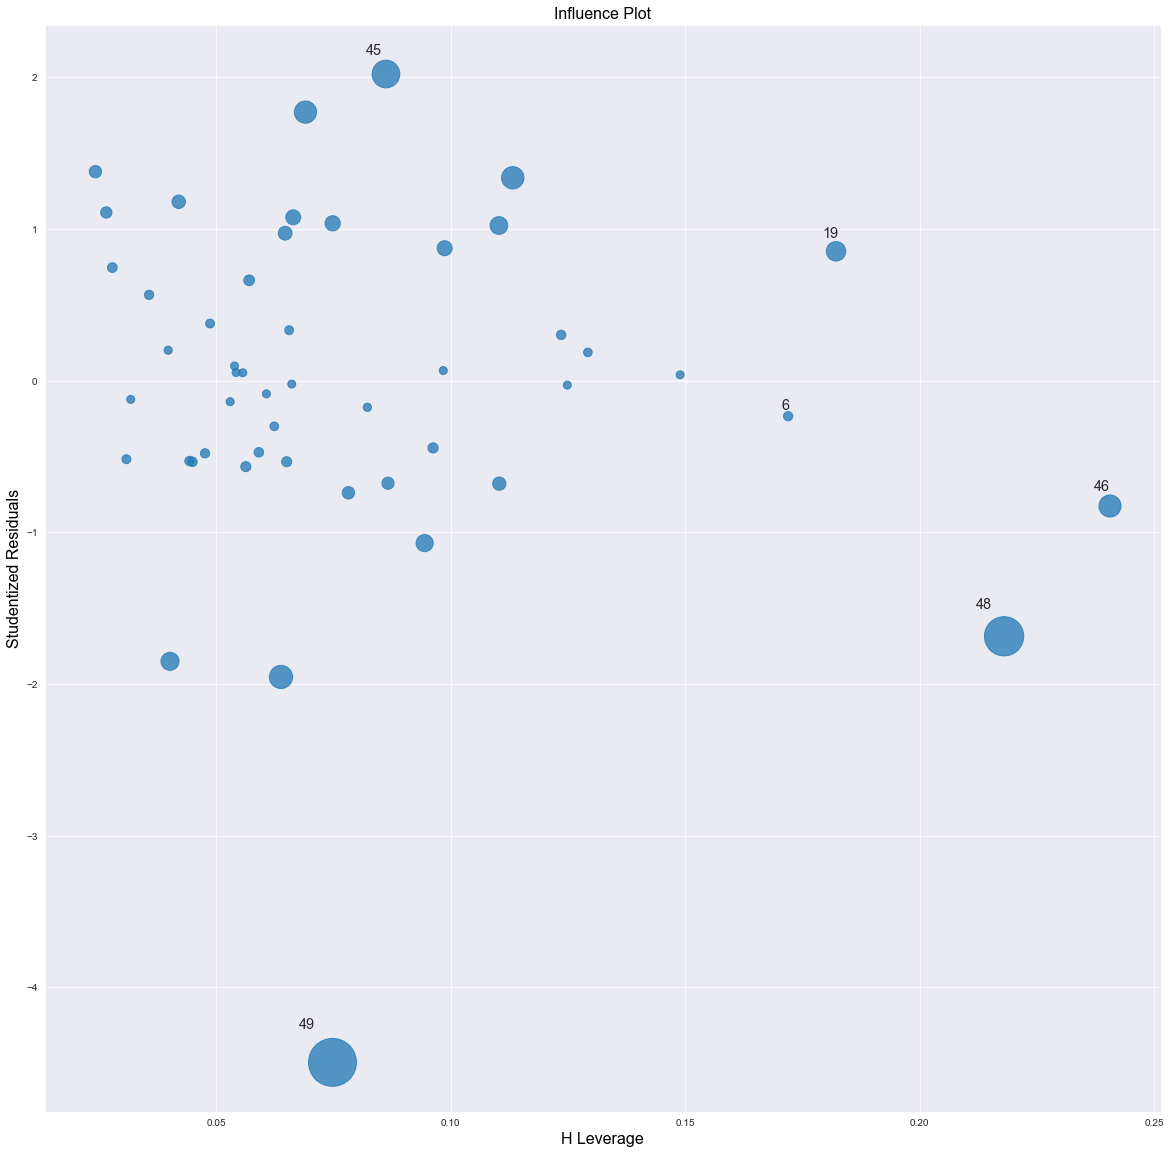

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [ ]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

#### From the above plot, it is evident that data point 49 is the influencer

In [ ]:
data[data.index.isin([49])]

,RND,Administration,Marketing,Profit
49,0.0,116983.8,45173.06,14681.4


In [ ]:
data.head()

,RND,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Improving the model

In [ ]:
# Creating a copy of data so that original dataset is not affected
new=data.copy()
new.head()

,RND,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
new2=new.drop(new.index[[46,49]],axis=0).reset_index()
new2

,index,RND,Administration,Marketing,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


# Model Dletion and Final Model

In [ ]:
 while np.max(c)>0.5 :
    model=smf.ols('Profit~RND+Administration+Marketing',data=new2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new2=new2.drop(new2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new2
else:
    final_model=smf.ols('Profit~RND+Administration+Marketing',data=new2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9603919744414697


In [ ]:
new2.head()

,index,RND,Administration,Marketing,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94


# Predicting for New Data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'RND':50000,'Administration':86000,'Marketing':40167},index=[0])
new_data

,RND,Administration,Marketing
0,50000,86000,40167


In [ ]:
final_model.predict(new_data)

0    89706.752469
dtype: float64

In [ ]:
pred_y=final_model.predict(new)
pred_y

0     190901.114167
1     187701.982404
2     180174.669694
3     172266.875360
4     170311.019102
5     162359.506070
6     155911.860506
7     159291.872906
8     151460.763635
9     153836.487018
10    135051.357556
11    135036.977650
12    129458.286363
13    128038.814226
14    149051.263138
15    145543.615135
16    118030.232760
17    130947.521848
18    129541.671857
19    115071.519414
20    117952.937536
21    119118.088699
22    116292.824305
23    111662.114745
24    113389.131533
25    103447.867097
26    111325.108498
27    116487.872715
28    103302.467062
29    102954.117204
30    100138.121374
31     98939.212219
32     99521.041015
33     99546.191790
34     91892.935716
35     92288.125855
36     78506.132698
37     90942.563609
38     72336.303469
39     85644.063928
40     77721.501392
41     77201.124583
42     73289.296228
43     62958.344921
44     67427.048609
45     50891.517587
46     61201.546474
47     49933.387604
48     51362.957201
49     51683.717126


# Table containing Rsquare value for each prepared model


In [ ]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.960392
